# Gold analysis

Analisi del comportamento dell'oro durante periodi di recessione USA e giornate di crollo della borsa

## a) Apertura e preparazione dataframe oro

In [329]:
import pandas as pd
import numpy as np

In [330]:
gold = pd.read_csv("gold.csv")

In [331]:
gold.head()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,2019-09-13,1499.8,1509.8,1486.7,1489.8,7.9,1492.9,5580.0,39286.0
1,2019-09-12,1499.1,1525.4,1490.5,1500.2,4.2,1500.8,6531.0,39225.0
2,2019-09-11,1486.8,1499.6,1486.8,1498.3,3.9,1496.6,3355.0,40353.0
3,2019-09-10,1500.2,1502.5,1485.7,1487.0,11.8,1492.7,6153.0,41698.0
4,2019-09-09,1509.2,1517.1,1499.1,1500.3,4.5,1504.5,6902.0,41879.0


In [332]:
import datetime as datetime
gold['Date'] = pd.to_datetime(gold['Date'])

In [333]:
gold.set_index("Date", inplace=True)

In [334]:
gold.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2019-09-13,1499.8,1509.8,1486.7,1489.8,7.9,1492.9,5580.0,39286.0
2019-09-12,1499.1,1525.4,1490.5,1500.2,4.2,1500.8,6531.0,39225.0
2019-09-11,1486.8,1499.6,1486.8,1498.3,3.9,1496.6,3355.0,40353.0
2019-09-10,1500.2,1502.5,1485.7,1487.0,11.8,1492.7,6153.0,41698.0
2019-09-09,1509.2,1517.1,1499.1,1500.3,4.5,1504.5,6902.0,41879.0


In [335]:
gold.isnull().apply(pd.value_counts)

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
False,11190,11192,11194,11195,1397,11224.0,11224.0,11224.0
True,34,32,30,29,9827,NaN,NaN,NaN


Poichè siamo solo interessati solo alle colonne 'Settle', 'Volume' e 'Previous Day Open Interest', eliminiamo le altre colonne che inoltre presentano valori nulli

In [336]:
cols_to_drop = ["Open", "High", "Low", "Last","Change"]
gold.drop(cols_to_drop, axis=1, inplace=True)

In [337]:
gold.head()

,Settle,Volume,Previous Day Open Interest
Date,,,
2019-09-13,1492.9,5580.0,39286.0
2019-09-12,1500.8,6531.0,39225.0
2019-09-11,1496.6,3355.0,40353.0
2019-09-10,1492.7,6153.0,41698.0
2019-09-09,1504.5,6902.0,41879.0


In [338]:
gold.sort_values('Date', inplace=True)

Creo una colonna con variazione % giornaliera del prezzo

In [339]:
gold["Change"] = np.log(gold["Settle"]/gold["Settle"].shift(1))

In [340]:
gold.head()

,Settle,Volume,Previous Day Open Interest,Change
Date,,,,
1974-12-31,183.9,512.0,237.0,NaN
1975-01-02,175.1,294.0,209.0,-0.049035
1975-01-03,174.7,174.0,216.0,-0.002287
1975-01-06,174.4,197.0,225.0,-0.001719
1975-01-07,173.4,98.0,240.0,-0.005750


## Verifica e pulizia dati

Al fine di pulire i dati dividiamo il dataframe per anni per applicare la funzione che individua outliers

In [341]:
years = []

for x in range(0,45):
    year = 1975 + x
    years.append(year)

In [342]:
years

[1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

In [343]:
for year in years:
    globals()['y_%s' % year] = gold[gold.index.year == year]

In [347]:
y_1975

,Settle,Volume,Previous Day Open Interest,Change
Date,,,,
1975-01-02,175.1,294.0,209.0,-0.049035
1975-01-03,174.7,174.0,216.0,-0.002287
1975-01-06,174.4,197.0,225.0,-0.001719
1975-01-07,173.4,98.0,240.0,-0.005750
1975-01-08,177.4,69.0,224.0,0.022806
1975-01-09,178.3,25.0,246.0,0.005060
1975-01-10,181.3,24.0,260.0,0.016686
1975-01-13,178.6,31.0,258.0,-0.015004
1975-01-14,178.6,7.0,255.0,0.000000


tramite boxplot verifichiamo se ci sono outlier per ogni anno, segniamo gli anni che presentano outliers e poi li esaminiamo successivamente gli outliers individuati

<function matplotlib.pyplot.show(*args, **kw)>

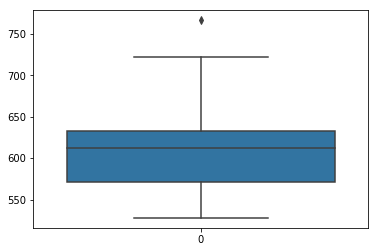

In [384]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=y_2006['Settle'])
plt.show

In [376]:
anomalies = []

# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(data):
    # Set upper and lower limit to 3 standard deviation
    data_std = np.std(data)
    data_mean = np.mean(data)
    anomaly_cut_off = data_std * 3
    
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    print(lower_limit, upper_limit)
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [385]:
find_anomalies(y_2006['Settle'])

482.523666337774 729.4803336622259


[766.4]

Con questo metodo non è possibile individuare outliers con riferimento ai prezzi di un asset finanziario poiche possono verificarsi giornate di forte incremento o caduta dei prezzi. Quindi procediamo verificando le variazioni di prezzo superiori ed inferiori al 6% e poi confrontandoli con un altro database (in questo caso investing.com)

In [373]:
gold[gold['Change'] > 0.06].sort_values('Date')

,Settle,Volume,Previous Day Open Interest,Change
Date,,,,
1978-11-24,228.2,168.0,13510.0,0.124929
1979-10-09,393.5,406.0,621.0,0.070264
1980-01-16,740.5,5287.0,18553.0,0.069910
1980-01-17,790.5,18073.0,18256.0,0.065340
1980-01-29,702.0,9005.0,8962.0,0.094029
1980-03-19,538.5,13802.0,16857.0,0.097448
1980-03-28,509.0,7193.0,5532.0,0.094721
1980-04-07,521.5,2146.0,3122.0,0.068240
1982-07-09,348.0,65840.0,51638.0,0.069301


In [214]:
gold.head()

,Settle,Volume,Previous Day Open Interest,Change
Date,,,,
1974-12-31,183.9,512.0,237.0,NaN
1975-01-02,175.1,294.0,209.0,-0.049035
1975-01-03,174.7,174.0,216.0,-0.002287
1975-01-06,174.4,197.0,225.0,-0.001719
1975-01-07,173.4,98.0,240.0,-0.005750


Eliminiamo i prezzi errati

In [381]:
gold.drop(pd.datetime(1978,11,24), inplace = True)

In [386]:
gold.drop(pd.datetime(2006,5,29), inplace = True)

In [387]:
gold.drop(pd.datetime(2006,11,24), inplace = True)

In [388]:
gold.drop(pd.datetime(2007,1,2), inplace = True)

In [389]:
gold.drop(pd.datetime(2007,1,15), inplace = True)

In [390]:
gold.drop(pd.datetime(2007,2,19), inplace = True)

In [391]:
gold.drop(pd.datetime(2007,5,28), inplace = True)

In [392]:
gold.drop(pd.datetime(2007,7,4), inplace = True)

In [398]:
gold.drop(pd.datetime(2007,9,3), inplace = True)

Una volta eliminati le righe corrispondenti a valori errati ricalcolo i rendimenti giornalieri logaritmici

In [400]:
gold["Change"] = np.log(gold["Settle"]/gold["Settle"].shift(1))

In [402]:
gold[gold['Change'] < -0.06].sort_values('Date')

,Settle,Volume,Previous Day Open Interest,Change
Date,,,,
1975-09-02,150.2,135.0,2830.0,-0.064455
1979-10-04,369.7,1040.0,2094.0,-0.062389
1979-10-11,386.8,658.0,873.0,-0.072056
1980-01-22,784.0,4592.0,16399.0,-0.061824
1980-01-23,734.0,4473.0,15847.0,-0.065900
1980-01-24,684.0,11592.0,13445.0,-0.070551
1980-01-25,635.0,11721.0,11986.0,-0.074333
1980-01-30,658.0,5463.0,4499.0,-0.064728
1980-02-22,615.0,5312.0,1311.0,-0.065300


## c) Analisi generale de dati

Inizio cercando la variazione di prezzo min e max

In [406]:
max_change = gold['Change'].max()
min_change = gold['Change'].min()
print(max_change)
print(min_change)

0.09744802511360588
-0.09909090264423089


Una volta calcolato il max e min individuo il giorno in cui sono avvenuti

In [404]:
print(gold[gold["Change"] == max_change])

            Settle   Volume  Previous Day Open Interest    Change
Date                                                             
1980-03-19   538.5  13802.0                     16857.0  0.097448


In [405]:
print(gold[gold["Change"] == min_change])

            Settle  Volume  Previous Day Open Interest    Change
Date                                                            
1980-03-17   480.0  8365.0                     17812.0 -0.099091


## d) Giornate Crash Borsa

#### I) Black Monday 19 Oct 1987

Infamous stock market crash that represented the greatest one-day percentage decline in U.S. stock market history, culminating in a bear market after a more than 20% plunge in the S&P 500 and Dow Jones Industrial Average. Among the primary causes of the chaos were program trading and illiquidity.

In [413]:
gold.loc[pd.datetime(1987,10,19)]

Settle                        481.70000
Volume                         68.00000
Previous Day Open Interest    279.00000
Change                          0.02119
Name: 1987-10-19 00:00:00, dtype: float64

Il giorno del maggior crash della borsa USA l'oro è salito solo del 2%

#### II) Black Wednesday 16 Sept 1992

The Conservative government was forced to withdraw the pound sterling from the European Exchange Rate Mechanism (ERM) after they were unable to keep sterling above its agreed lower limit.

In [422]:
gold.loc[pd.datetime(1992,9,16)]

Settle                         350.200000
Volume                         661.000000
Previous Day Open Interest    4727.000000
Change                           0.009468
Name: 1992-09-16 00:00:00, dtype: float64

#### III) 1997 Asian Financial Crisis

Investors deserted emerging Asian shares, including an overheated Hong Kong stock market. Crashes occur in Thailand, Indonesia, South Korea, Philippines, and elsewhere, reaching a climax in the October 27, 1997 mini-crash.

In [423]:
gold.loc[pd.datetime(1997,10,27)]

Settle                        311.300000
Volume                        163.000000
Previous Day Open Interest    154.000000
Change                          0.012933
Name: 1997-10-27 00:00:00, dtype: float64

#### VI) Russia financial crisis

The Russian government devalues the ruble, defaults on domestic debt, and declares a moratorium on payment to foreign creditors.

In [425]:
gold.loc[pd.datetime(1998,8,17)]

Settle                        285.300000
Volume                         77.000000
Previous Day Open Interest    727.000000
Change                          0.004919
Name: 1998-08-17 00:00:00, dtype: float64

#### V) Dot-com bubble

In [430]:
gold.loc[pd.datetime(2000,3,10)]

Settle                          290.000000
Volume                        33677.000000
Previous Day Open Interest    65421.000000
Change                           -0.009267
Name: 2000-03-10 00:00:00, dtype: float64

#### VI) September 11 attacks

The September 11 attacks caused global stock markets to drop sharply. The attacks themselves caused approximately $40 billion in insurance losses, making it one of the largest insured events ever. See world economic effects arising from the September 11 attacks

In [438]:
gold.loc[pd.datetime(2001,9,14)]

Settle                         291.100000
Volume                        2522.000000
Previous Day Open Interest    8296.000000
Change                           0.066762
Name: 2001-09-14 00:00:00, dtype: float64

abbiamo controllato il 14 settembre poichè l'11 settembre le negoziazioni sono state ferme

#### VII) Stock market downturn of 2002

Downturn in stock prices during 2002 in stock exchanges across the United States, Canada, Asia, and Europe. After recovering from lows reached following the September 11 attacks, indices slid steadily starting in March 2002, with dramatic declines in July and September leading to lows last reached in 1997 and 1998. See stock market downturn of 2002.

In [443]:
gold.loc[pd.datetime(2002,10,9)]

Settle                        319.60000
Volume                          5.00000
Previous Day Open Interest    853.00000
Change                          0.00439
Name: 2002-10-09 00:00:00, dtype: float64

#### VIII) Chinese stock bubble 2007

The SSE Composite Index of the Shanghai Stock Exchange tumbles 9% from unexpected selloffs, the largest drop in 10 years, triggering major drops in worldwide stock markets.

In [446]:
gold.loc[pd.datetime(2007,2,27)]

Settle                           687.200000
Volume                        131907.000000
Previous Day Open Interest    241133.000000
Change                             0.001019
Name: 2007-02-27 00:00:00, dtype: float64

#### IX) USA bear market 11 Oct 2007

From their peaks in October 2007 until their closing lows in early March 2009, the Dow Jones Industrial Average, Nasdaq Composite and S&P 500 all suffered declines of over 50%, marking the worst stock market crash since the Great Depression era.

In [452]:
gold.loc[pd.datetime(2007,10,11)]

Settle                        751.300000
Volume                         32.000000
Previous Day Open Interest    603.000000
Change                          0.014614
Name: 2007-10-11 00:00:00, dtype: float64

#### X) Financial crisis 2007-08

On September 16, 2008, failures of large financial institutions in the United States, due primarily to exposure of securities of packaged subprime loans and credit default swaps issued to insure these loans and their issuers, rapidly devolved into a global crisis resulting in a number of bank failures in Europe and sharp reductions in the value of equities (stock) and commodities worldwide. 

In [455]:
gold.loc[pd.datetime(2008,9,16)]

Settle                          777.100000
Volume                         6285.000000
Previous Day Open Interest    28972.000000
Change                           -0.008585
Name: 2008-09-16 00:00:00, dtype: float64

#### XI) Flash crash

The Dow Jones Industrial Average suffers its worst intra-day point loss, dropping nearly 1,000 points before partially recovering.

In [459]:
gold.loc[pd.datetime(2010,5,6)]

Settle                          1197.300000
Volume                        180541.000000
Previous Day Open Interest    339508.000000
Change                             0.018801
Name: 2010-05-06 00:00:00, dtype: float64

## e) Andamento Gold nei periodi di recessione USA

In [462]:
gold.head()

,Settle,Volume,Previous Day Open Interest,Change
Date,,,,
1974-12-31,183.9,512.0,237.0,NaN
1975-01-02,175.1,294.0,209.0,-0.049035
1975-01-03,174.7,174.0,216.0,-0.002287
1975-01-06,174.4,197.0,225.0,-0.001719
1975-01-07,173.4,98.0,240.0,-0.005750


#### I) 1980 Recession

The NBER considers a very short recession to have occurred in 1980, followed by a short period of growth and then a deep recession. Unemployment remained relatively elevated in between recessions. The recession began as the Federal Reserve, under Paul Volcker, raised interest rates dramatically to fight the inflation of the 1970s. The early 1980s are sometimes referred to as a "double-dip" or "W-shaped" recession.

Peak Unemployment = 7.8%

GDP decline (peak to trough) = -2.2%

Period Range: Jan 1980 - July 1980

In [476]:
gold_recession_1980 = round(((gold.loc[pd.datetime(1980,7,31)]['Settle']/gold.loc[pd.datetime(1980,1,2)]['Settle']) -1 ) * 100,2)
print('Gold return: '+str(gold_recession_1980)+'%')

Gold return: 9.49%


In [478]:
gold_pre_recession_1980 =round(((gold.loc[pd.datetime(1979,12,31)]['Settle']/gold.loc[pd.datetime(1979,1,2)]['Settle']) -1 ) * 100,2)
print('Gold return: '+str(gold_pre_recession_1980)+'%')

Gold return: 141.41%


In [482]:
gold_post_recession_1980 = round(((gold.loc[pd.datetime(1981,6,30)]['Settle']/gold.loc[pd.datetime(1980,8,1)]['Settle']) -1 ) * 100,2)
print('Gold return: '+str(gold_post_recession_1980)+'%')

Gold return: -30.61%


#### II) 1981-1982 recession

The Iranian Revolution sharply increased the price of oil around the world in 1979, causing the 1979 energy crisis. This was caused by the new regime in power in Iran, which exported oil at inconsistent intervals and at a lower volume, forcing prices up. Tight monetary policy in the United States to control inflation led to another recession. The changes were made largely because of inflation carried over from the previous decade because of the 1973 oil crisis and the 1979 energy crisis.

Peak Unemployment = 10.8%

GDP decline (peak to trough) = -2.7%

Period Range: July 1981 - Nov 1982

In [483]:
gold_recession_1981_82 = round(((gold.loc[pd.datetime(1982,11,30)]['Settle']/gold.loc[pd.datetime(1981,7,1)]['Settle']) -1 ) * 100,2)
print('Gold return: '+str(gold_recession_1981_82)+'%')

Gold return: 5.63%


In [484]:
gold_pre_recession_1981_82 = round(((gold.loc[pd.datetime(1981,6,30)]['Settle']/gold.loc[pd.datetime(1980,8,1)]['Settle']) -1 ) * 100,2)
print('Gold return: '+str(gold_pre_recession_1981_82)+'%')

Gold return: -30.61%


In [508]:
gold_post_recession_1981_82 = round(((gold.loc[pd.datetime(1983,12,1)]['Settle']/gold.loc[pd.datetime(1982,12,1)]['Settle']) -1 ) * 100,2)
print('Gold return: '+str(gold_post_recession_1981_82)+'%')

Gold return: -7.85%


#### III) Early 1990s recession

After the lengthy peacetime expansion of the 1980s, inflation began to increase and the Federal Reserve responded by raising interest rates from 1986 to 1989. This weakened but did not stop growth, but some combination of the subsequent 1990 oil price shock, the debt accumulation of the 1980s, and growing consumer pessimism combined with the weakened economy to produce a brief recession.

Peak Unemployment = 7.8%

GDP decline (peak to trough) = -1.4%

Period Range: July 1990 - Mar 1991

In [492]:
gold_recession_1990_91 = round(((gold.loc[pd.datetime(1991,3,28)]['Settle']/gold.loc[pd.datetime(1990,7,2)]['Settle']) -1 ) * 100,2)
print('Gold return: '+str(gold_recession_1990_91)+'%')

Gold return: -1.03%


In [494]:
gold_pre_recession_1990_91 = round(((gold.loc[pd.datetime(1990,6,29)]['Settle']/gold.loc[pd.datetime(1989,6,30)]['Settle']) -1 ) * 100,2)
print('Gold return: '+str(gold_pre_recession_1990_91)+'%')

Gold return: -4.61%


In [495]:
gold_post_recession_1990_91 = round(((gold.loc[pd.datetime(1992,4,1)]['Settle']/gold.loc[pd.datetime(1991,4,1)]['Settle']) -1 ) * 100,2)
print('Gold return: '+str(gold_post_recession_1990_91)+'%')

Gold return: -4.86%


#### IV) Early 2000 recession

The 1990s once were the longest period of growth in American history. The collapse of the speculative dot-com bubble, a fall in business outlays and investments, and the September 11th attacks, brought the decade of growth to an end. Despite these major shocks, the recession was brief and shallow.

Peak Unemployment = 6.3%

GDP decline (peak to trough) = -0.3%

Period Range: Mar 2001 - Nov 2001

In [496]:
gold_recession_2001 = round(((gold.loc[pd.datetime(2001,11,30)]['Settle']/gold.loc[pd.datetime(2001,3,1)]['Settle']) -1 ) * 100,2)
print('Gold return: '+str(gold_recession_2001)+'%')

Gold return: 2.89%


In [498]:
gold_pre_recession_2001 = round(((gold.loc[pd.datetime(2001,2,28)]['Settle']/gold.loc[pd.datetime(2000,2,28)]['Settle']) -1 ) * 100,2)
print('Gold return: '+str(gold_pre_recession_2001)+'%')

Gold return: -8.97%


In [507]:
gold_post_recession_2001 = round(((gold.loc[pd.datetime(2002,12,3)]['Settle']/gold.loc[pd.datetime(2001,12,3)]['Settle']) -1 ) * 100,2)
print('Gold return: '+str(gold_post_recession_2001)+'%')

Gold return: 15.64%


#### V) Great recession

The subprime mortgage crisis led to the collapse of the United States housing bubble. Falling housing-related assets contributed to a global financial crisis, even as oil and food prices soared. The crisis led to the failure or collapse of many of the United States' largest financial institutions: Bear Stearns, Fannie Mae, Freddie Mac, Lehman Brothers, and AIG, as well as a crisis in the automobile industry. The government responded with an unprecedented 700 billion bank bailout and $787 billion fiscal stimulus package. The National Bureau of Economic Research declared the end of this recession over a year after the end date. The Dow Jones Industrial Average (Dow) finally reached its lowest point on March 9, 2009.

Peak Unemployment = 10%

GDP decline (peak to trough) = -5.1%

Period Range: Dec 2007- June 2009

In [504]:
gold_recession_2007_09 = round(((gold.loc[pd.datetime(2009,6,30)]['Settle']/gold.loc[pd.datetime(2007,11,1)]['Settle']) -1 ) * 100,2)
print('Gold return: '+str(gold_recession_2007_09)+'%')

Gold return: 16.85%


In [505]:
gold_pre_recession_2007_09 = round(((gold.loc[pd.datetime(2007,10,31)]['Settle']/gold.loc[pd.datetime(2006,10,31)]['Settle']) -1 ) * 100,2)
print('Gold return: '+str(gold_pre_recession_2007_09)+'%')

Gold return: 31.06%


In [506]:
gold_post_recession_2007_09 = round(((gold.loc[pd.datetime(2010,7,1)]['Settle']/gold.loc[pd.datetime(2009,7,1)]['Settle']) -1 ) * 100,2)
print('Gold return: '+str(gold_post_recession_2007_09)+'%')

Gold return: 28.2%
